# Sección 5: Técnicas para Evaluar Límites

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, limit, sin, cos, tan, sqrt, Piecewise, lambdify, numer, denom, oo,Eq, solve, sqrt
from sympy.abc import x, h
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

# Configuración general de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Evaluación por Sustitución Directa

**Cuando usar**: Cuando la función es continua en el punto de interés.

**Ejemplo**:

lim(x→-2) (x² + 2x + 6) = 6


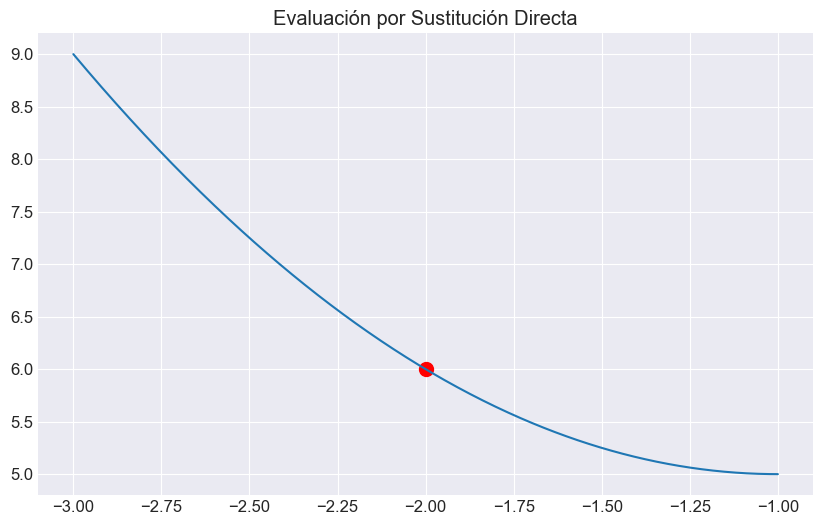

In [2]:
f = x**2 + 2*x + 6
limite = limit(f, x, -2)
print(f"lim(x→-2) (x² + 2x + 6) = {limite}")

# Gráfico
x_vals = np.linspace(-3, -1, 500)
f_lamb = lambdify(x, f, 'numpy')
plt.plot(x_vals, f_lamb(x_vals))
plt.scatter(-2, f_lamb(-2), color='red', s=100)
plt.title("Evaluación por Sustitución Directa")
plt.grid(True)
plt.show()

## 2. Evaluación por Factorización

**Cuando usar**: Cuando la sustitución directa resulta en 0/0 (forma indeterminada).

**Ejemplo**:

f(4) = nan
lim(x→4) (x²-16)/(x-4) = 8


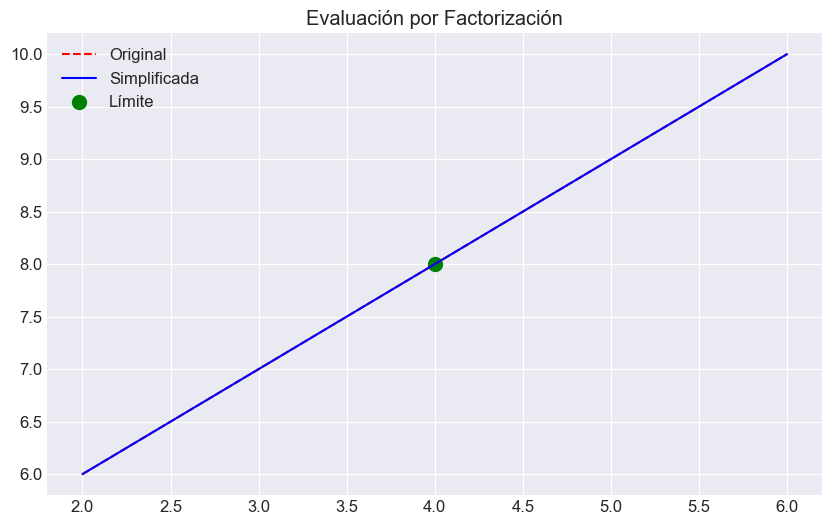

In [3]:
f = (x**2 - 16)/(x - 4)
f_simplified = (x - 4)*(x + 4)/(x - 4)

# Antes de simplificar
try:
    print(f"f(4) = {f.subs(x, 4)}")  # Indeterminado
except:
    print("f(4) es indeterminado")

# Después de simplificar
limite = limit(f_simplified, x, 4)
print(f"lim(x→4) (x²-16)/(x-4) = {limite}")

# Gráfico comparativo
x_vals = np.linspace(2, 6, 500)
x_vals = x_vals[x_vals != 4]  # Excluir x=4

plt.plot(x_vals, lambdify(x, f, 'numpy')(x_vals), 'r--', label='Original')
plt.plot(x_vals, lambdify(x, f_simplified, 'numpy')(x_vals), 'b-', label='Simplificada')
plt.scatter(4, limite, color='green', s=100, label='Límite')
plt.title("Evaluación por Factorización")
plt.legend()
plt.grid(True)
plt.show()

## 3. Método del Conjugado

**Cuando usar**: Para límites con raíces cuadradas que resultan en forma indeterminada.

**Ejemplo**:

Simplificación paso a paso:
(sqrt(h + 4) - 2)/h
lim(h→0) (√(4+h)-2)/h = 1/4


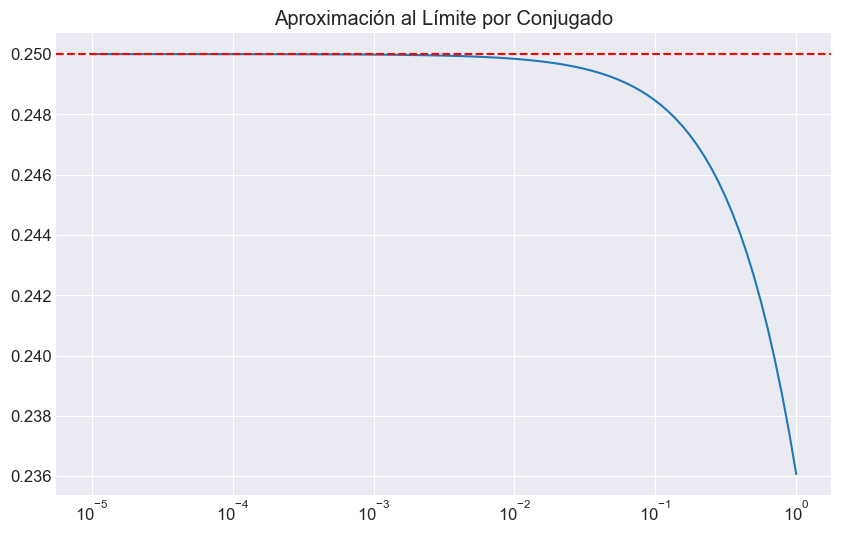

In [12]:
from sympy import symbols, sqrt, limit, lambdify, Rational, Pow, Add

# Definir la variable simbólica
h = symbols('h')

# Construir la expresión paso a paso usando los constructores de SymPy
sqrt_expr = Pow(4 + h, Rational(1, 2))  # Equivale a sqrt(4 + h)
numerador = Add(sqrt_expr, -2)  # sqrt(4 + h) - 2
f = numerador / h

# Construir el conjugado de la misma manera
conjugado = Add(sqrt_expr, 2)  # sqrt(4 + h) + 2

# Multiplicar por el conjugado
f_simplified = (f * conjugado) / conjugado

# Simplificación paso a paso
f_simplified = f_simplified.simplify()
print("Simplificación paso a paso:")
print(f_simplified)

# Calcular el límite
limite = limit(f_simplified, h, 0)
print(f"lim(h→0) (√(4+h)-2)/h = {limite}")

# Gráfico de aproximación
h_vals = np.logspace(-5, 0, 100)  # Valores cercanos a 0
f_lamb = lambdify(h, f, 'numpy')
plt.plot(h_vals, f_lamb(h_vals))
plt.axhline(limite, color='red', linestyle='--')
plt.xscale('log')
plt.title("Aproximación al Límite por Conjugado")
plt.grid(True)
plt.show()

## 4. Límites Trigonométricos

**Límites clave**:
1. $\lim_{x \to 0} \sin x = 0$
2. $\lim_{x \to 0} \cos x = 1$
3. $\lim_{x \to 0} \frac{\sin x}{x} = 1$

**Ejemplo**:

lim(x→0) (1-cos x)/x = 0


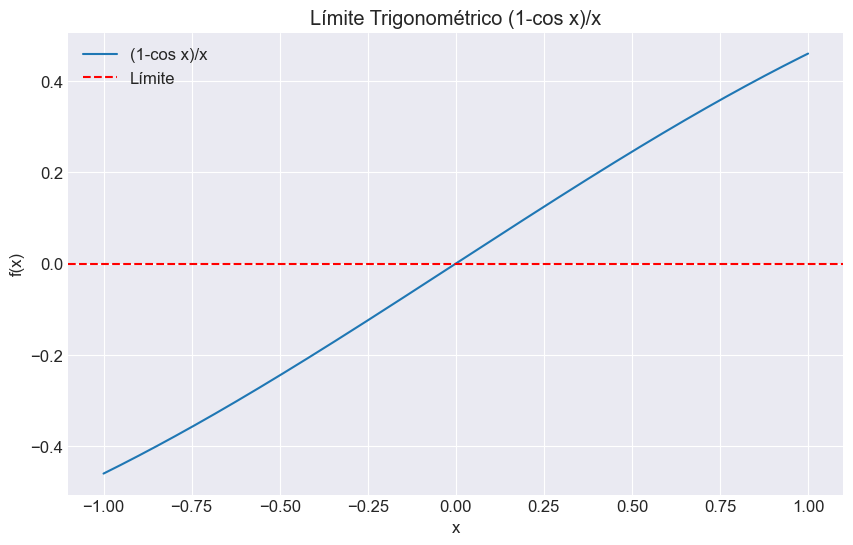

In [15]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin, limit, lambdify, S

# Configuración inicial
x = symbols('x')

## Versión 1: Usando constructores SymPy explícitos ----------------------------

# Construir la expresión paso a paso usando los constructores de SymPy
numerador = sympy.Add(S(1), sympy.Mul(-1, sympy.cos(x)))  # 1 - cos(x)
f = sympy.Mul(numerador, sympy.Pow(x, -1))  # (1 - cos(x))/x

# Construir el conjugado
conjugado_num = sympy.Add(S(1), sympy.cos(x))  # 1 + cos(x)
conjugado_den = conjugado_num  # Mismo denominador

# Multiplicar por el conjugado
f_simplified = sympy.Mul(f, sympy.Mul(conjugado_num, sympy.Pow(conjugado_den, -1)))

# Simplificar la expresión
f_simplified = f_simplified.simplify()

# Aplicar identidad trigonométrica
f_simplified = f_simplified.subs(sympy.Add(S(1), sympy.Mul(-1, sympy.Pow(sympy.cos(x), 2))), sympy.Pow(sympy.sin(x), 2))

# Calcular el límite (ambas versiones dan el mismo resultado)
limite = limit(f_simplified, x, 0)
print(f"lim(x→0) (1-cos x)/x = {limite}")

# Gráfico de aproximación
x_vals = np.linspace(-1, 1, 500)
x_vals = x_vals[x_vals != 0]  # Excluir x=0
f_lamb = lambdify(x, f, 'numpy')

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_lamb(x_vals), label='(1-cos x)/x')
plt.axhline(float(limite), color='red', linestyle='--', label='Límite')
plt.title("Límite Trigonométrico (1-cos x)/x")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## 5. Límites Infinitos y Asíntotas

### Asíntotas Verticales

lim(x→1⁻) 1/(x-1)² = oo
lim(x→1⁺) 1/(x-1)² = oo


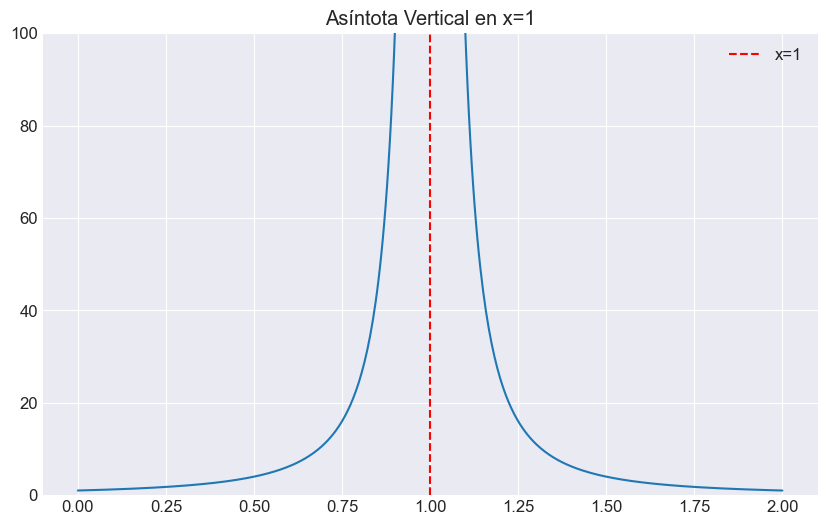

In [6]:
f = 1/(x - 1)**2
limite_izq = limit(f, x, 1, '-')
limite_der = limit(f, x, 1, '+')

print(f"lim(x→1⁻) 1/(x-1)² = {limite_izq}")
print(f"lim(x→1⁺) 1/(x-1)² = {limite_der}")

# Gráfico
x_vals = np.linspace(0, 2, 500)
x_vals = x_vals[x_vals != 1]  # Excluir x=1
plt.plot(x_vals, lambdify(x, f, 'numpy')(x_vals))
plt.axvline(1, color='red', linestyle='--', label='x=1')
plt.ylim(0, 100)  # Limitar el rango y para mejor visualización
plt.title("Asíntota Vertical en x=1")
plt.legend()
plt.grid(True)
plt.show()

### Asíntotas Horizontales

Análisis de grados:
f(x): N=3, D=1
g(x): N=1, D=3
h(x): N=3, D=3
\nLímites en infinito:
lim(x→∞) f(x) = oo
lim(x→∞) g(x) = 0
lim(x→∞) h(x) = 1


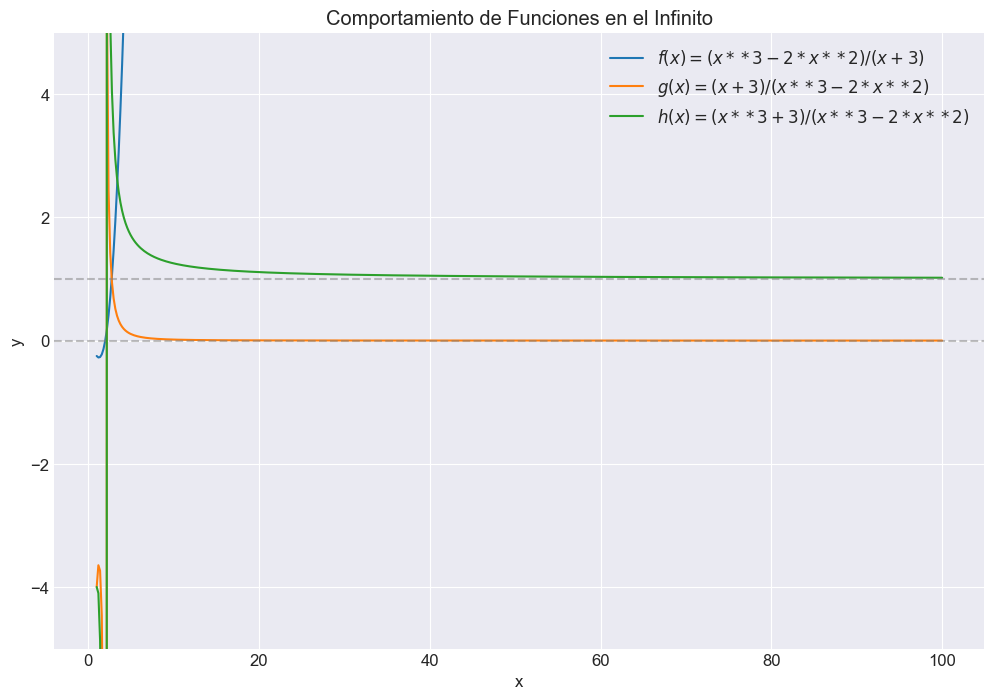

In [7]:
def grado(expr):
    """Calcula el grado de un polinomio en x"""
    poly = expr.as_poly(x)
    if poly is not None:
        return poly.degree()
    elif expr.is_constant():
        return 0
    else:
        return None  # No es un polinomio en x

# Definición de las funciones
f = (x**3 - 2*x**2)/(x + 3)
g = (x + 3)/(x**3 - 2*x**2)
h = (x**3 + 3)/(x**3 - 2*x**2)

print("Análisis de grados:")
print(f"f(x): N={grado(f.as_numer_denom()[0])}, D={grado(f.as_numer_denom()[1])}")
print(f"g(x): N={grado(g.as_numer_denom()[0])}, D={grado(g.as_numer_denom()[1])}")
print(f"h(x): N={grado(h.as_numer_denom()[0])}, D={grado(h.as_numer_denom()[1])}")

# Cálculo de límites
print('\\nLímites en infinito:')
print(f'lim(x→∞) f(x) = {limit(f, x, oo)}')
print(f'lim(x→∞) g(x) = {limit(g, x, oo)}')
print(f'lim(x→∞) h(x) = {limit(h, x, oo)}')

# Visualización de las funciones
x_vals = np.linspace(1, 100, 500)
f_lamb = lambdify(x, f, 'numpy')
g_lamb = lambdify(x, g, 'numpy')
h_lamb = lambdify(x, h, 'numpy')

plt.figure(figsize=(12, 8))
plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = {str(f)}$')
plt.plot(x_vals, g_lamb(x_vals), label=f'$g(x) = {str(g)}$')
plt.plot(x_vals, h_lamb(x_vals), label=f'$h(x) = {str(h)}$')
plt.axhline(1, color='gray', linestyle='--', alpha=0.5)
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.title('Comportamiento de Funciones en el Infinito')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-5, 5)
plt.show()

## 6. Funciones Continuas por Partes

**Ejemplo**:

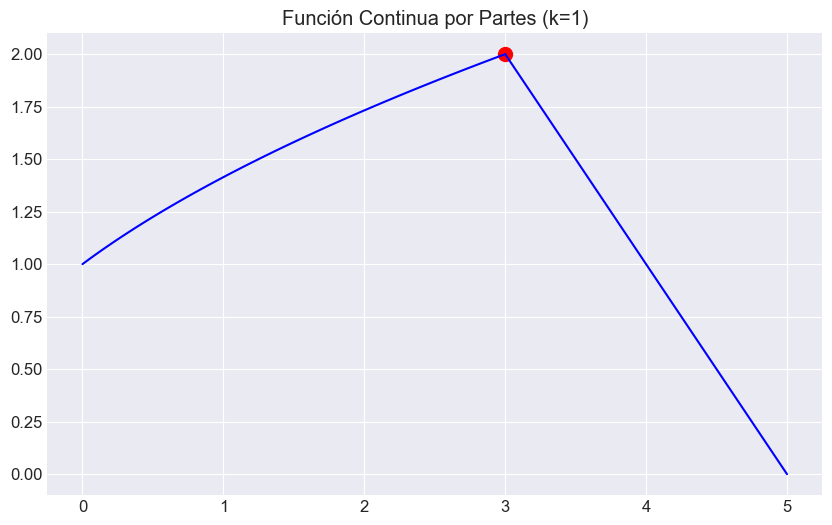

In [8]:
k = symbols('k')
f_piecewise = Piecewise(
    (k*sqrt(x + 1), (x >= 0) & (x <= 3)),
    (5 - x, (x > 3) & (x <= 5))
)

# Encontrar k para continuidad en x=3
eq = Eq(k*sqrt(3 + 1), 5 - 3)
sol_k = solve(eq, k)[0]  # k = 1

f_continuous = f_piecewise.subs(k, sol_k)

# Gráfico
x_vals1 = np.linspace(0, 3, 100)
x_vals2 = np.linspace(3, 5, 100)
f_lamb = lambdify((x, k), f_piecewise, 'numpy')

plt.plot(x_vals1, f_lamb(x_vals1, 1), 'b-')
plt.plot(x_vals2, f_lamb(x_vals2, 1), 'b-')
plt.scatter(3, f_lamb(3, 1), color='red', s=100)
plt.title("Función Continua por Partes (k=1)")
plt.grid(True)
plt.show()

## Resumen de Técnicas

| **Método**          | **Cuando Usar**                          | **Ejemplo Típico**                     |
|----------------------|------------------------------------------|----------------------------------------|
| Sustitución          | Función continua en el punto             | $\lim_{x \to 2} (x^2 + 3)$            |
| Factorización        | Forma 0/0 con expresiones factorizables  | $\lim_{x \to 3} \frac{x^2-9}{x-3}$    |
| Conjugado            | Raíces cuadradas con forma 0/0           | $\lim_{h \to 0} \frac{\sqrt{h+4}-2}{h}$ |
| Trigonométricos      | Límites que involucran funciones trig    | $\lim_{x \to 0} \frac{\sin x}{x}$     |
| Análisis de límites  | Comportamiento en infinito               | $\lim_{x \to \infty} \frac{1}{x}$     |
| Funciones por partes | Puntos de unión entre partes de función  | $\lim_{x \to c} f(x)$ donde f es definida por partes |